# PDI
Eduardo Henrique Farias Silva
## Image stitching

In [59]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

> Load images

In [60]:
images_path = glob.glob('/content/datasets/ic*.jpg')
images = []
for path in images_path:
    image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    images.append(image)

> Stitching images

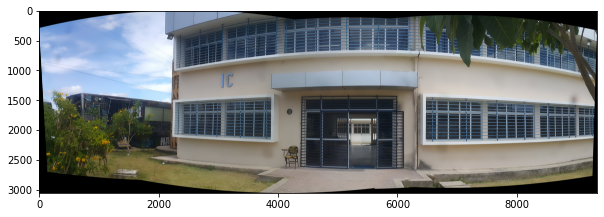

In [61]:
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch(images)

plt.figure(figsize=(10, 15))
plt.imshow(stitched)
plt.show()

> Crop

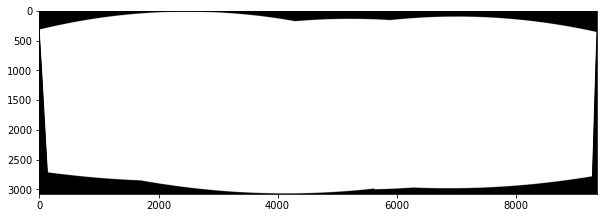

In [62]:
# Create a 10 px border
stitched = cv2.copyMakeBorder(stitched, 10, 10, 10, 10, cv2.BORDER_CONSTANT, (0, 0, 0))
# Convert image to grayscale
gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)
# Threshold image, (px > 0) -> px = 255
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

plt.figure(figsize=(10, 15))
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.show()

> Draw the smallest rectangular region to fit the panorama

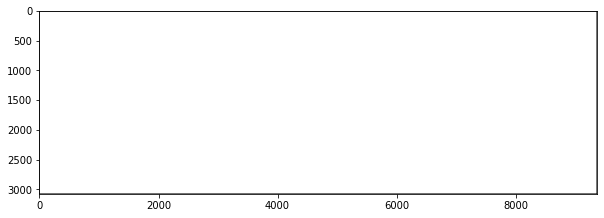

In [63]:
# Get largest contour
countors = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
max_countor = max(countors[0], key=cv2.contourArea)

# Create mask that will contain the 
mask = np.zeros(thresh.shape, dtype="uint8")
(x, y, w, h) = cv2.boundingRect(max_countor)
cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)

plt.figure(figsize=(10, 15))
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()

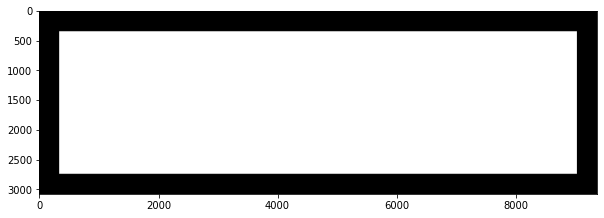

In [64]:
minRect = mask.copy()
sub = mask.copy()
while cv2.countNonZero(sub) > 0:
    minRect = cv2.erode(minRect, None)
    sub = cv2.subtract(minRect, thresh)

plt.figure(figsize=(10, 15))
plt.imshow(cv2.cvtColor(minRect, cv2.COLOR_BGR2RGB))
plt.show()

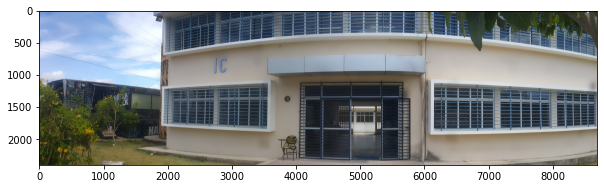

In [65]:
contours = cv2.findContours(minRect.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
max_contour = max(contours[0], key=cv2.contourArea)
(x, y, w, h) = cv2.boundingRect(max_contour)
stitched = stitched[y:y + h, x:x + w]

plt.figure(figsize=(10, 15))
plt.imshow(stitched)
plt.show()